<a href="https://colab.research.google.com/github/Zeitgeisth/ArtificialIntelligence/blob/main/Simulated_Annealing_Part_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
def getAllPaths(G, sink, source):
  paths = nx.all_simple_edge_paths(G, source=source, target=sink, cutoff=9)
  p = []

  for path in paths:
    p.append(path)

  return p


In [5]:
import math

def getMinCapacity(G, successor):
  minimum = math.inf
  for i, j in successor:
    capacity = G[i][j]['capacity']
    if(capacity < minimum):
      minimum = capacity
  return int(minimum)


In [6]:
def getFlow(Flows):
  flow = 0
  for f in Flows:
    flow = flow + f
  return flow

In [49]:
def adjustFlow(successor, flowValue, all_paths, initializeFlow1):
  for it, flow in enumerate(initializeFlow1):
    if(flow != 0):
      paths = all_paths[it]
      for sEdge in successor:
        if sEdge in paths:
          initializeFlow1[it] = 0

  for it, path in enumerate(all_paths):
    if(successor == path):
      initializeFlow1[it] = flowValue

  return initializeFlow1

In [48]:
def change_in_flow(graph, source, sink, successor, all_paths, initializeFlow1):
  currentFlow = getFlow(initializeFlow1)

  minCapacityofSuccessor = getMinCapacity(graph, successor)
  flowValue = max(0, np.random.randint(minCapacityofSuccessor)) + 1
  initializeFlow1 = adjustFlow(successor, flowValue, all_paths, initializeFlow1)

  successorFlow = getFlow(initializeFlow1)
  changeFlow = successorFlow - currentFlow

  return flowValue, changeFlow, initializeFlow1

In [47]:
import math
import random
import copy

def verifySuccessor(current, successor, flowValue, changeInFlow, T, initializeFlow1, initializeFlow2):
  nextPath = None
  if(changeInFlow > 0):
    nextPath = successor
    initializeFlow2 = copy.copy(initializeFlow1)
  elif(changeInFlow < 0):
    probToAccept = math.exp(changeInFlow / T)
    randValue = random.random()
    if(probToAccept > randValue):
      nextPath = successor
      initializeFlow2 = copy.copy(initializeFlow1)
    else:
      nextPath = current
      initializeFlow1 = copy.copy(initializeFlow2)
  else:
    nextPath = current
    initializeFlow1 = copy.copy(initializeFlow2)

  return initializeFlow1, initializeFlow2, nextPath



In [10]:
def adjustGraph(graph, all_paths, initializeFlow2):
  for enu, path in enumerate(all_paths):
    for i, j in path:
      graph[i][j]['flow'] = 0


  for enu, path in enumerate(all_paths):
    for i, j in path:
      if(initializeFlow2[enu] != 0):
        ##print(str(i)+','+str(j)+":"+str(initializeFlow2[enu]))
        graph[i][j]['flow'] = initializeFlow2[enu]

  return graph


In [55]:
def getGraphFlow(G, sink):
  currentFlow = 0
  edgesFlow = G.in_edges(sink)

  for i, j in edgesFlow:
    currentFlow = currentFlow + G[i][j]['flow']
  return currentFlow

In [61]:
def display_graph(graph):
  print('CAPACITY:')
  print('--------------------------------------------------------------------------------')

  links = [(u, v) for (u, v, d) in graph.edges(data=True)]
  pos = nx.nx_pydot.graphviz_layout(graph)
  nx.draw_networkx_nodes(graph, pos, node_size=800, node_color='lightblue', linewidths=0.05)
  nx.draw_networkx_edges(graph, pos, edgelist=links, width=2)

  nx.draw_networkx_labels(graph, pos, font_size=20, font_family="sans-serif")

  edge_labels = nx.get_edge_attributes(graph, 'capacity')
  ##print(edge_labels)

  nx.draw_networkx_edge_labels(graph, pos, edge_labels)

  plt.show()
  print('--------------------------------------------------------------------------------')
  print('FLOW:')
  print('--------------------------------------------------------------------------------')
  links = [(u, v) for (u, v, d) in graph.edges(data=True)]
  pos = nx.nx_pydot.graphviz_layout(graph)
  nx.draw_networkx_nodes(graph, pos, node_size=800, node_color='lightblue', linewidths=0.05)
  nx.draw_networkx_edges(graph, pos, edgelist=links, width=2)

  nx.draw_networkx_labels(graph, pos, font_size=20, font_family="sans-serif")

  edge_labels = nx.get_edge_attributes(graph, 'flow')
  ##print(edge_labels)

  nx.draw_networkx_edge_labels(graph, pos, edge_labels)

  plt.show()

  print('-------------------------------------------------------------------------------')
  print('Maximum Flow through our Algorithm')
  print(getGraphFlow(graph, 'e'))


  print('-------------------------------------------------------------------------------')
  print('Maximum Flow through Edmonds Karp Algortihm')
  from networkx.algorithms.flow import edmonds_karp
  R = edmonds_karp(G, 's', 'e')
  flow_value = nx.maximum_flow_value(R, 's', 'e') # The Edmonds Karp algorithm computes out the optimal flow for any given graph. Note that node 4 represents the sink node T.
  print(flow_value)




In [59]:
import numpy as np

def simulated_annealing(graph, source, sink, initialTemp, coolingSchedule):
  all_paths = getAllPaths(graph, sink, source)
  initializeFlow1 = [0] * len(all_paths)
  initializeFlow2 = [0] * len(all_paths)


  T = initialTemp
  alpha = coolingSchedule
  current = None
  currentIndex = -1
  loop = 0

  while round(float(T), 2) != 0.00:
    successor = None


    successorIndex = np.random.randint(0, len(all_paths))
    successor = all_paths[successorIndex]

    while successorIndex == currentIndex:
      successorIndex = np.random.randint(0, len(all_paths))
      successor = all_paths[successorIndex]

    flowValue, changeInFlow, initializeFlow1 = change_in_flow(graph, source, sink, successor, all_paths, initializeFlow1)
    initializeFlow1, initializeFlow2, current = verifySuccessor(current, successor, flowValue, changeInFlow, T, initializeFlow1, initializeFlow2)

    graph = adjustGraph(graph, all_paths, initializeFlow1)

    T = T * (1 - alpha)

  display_graph(graph)






CAPACITY:
--------------------------------------------------------------------------------


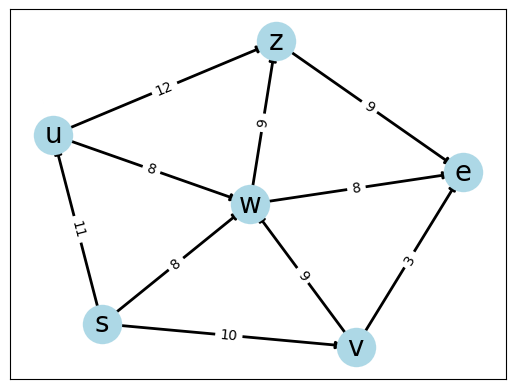

--------------------------------------------------------------------------------
FLOW:
--------------------------------------------------------------------------------


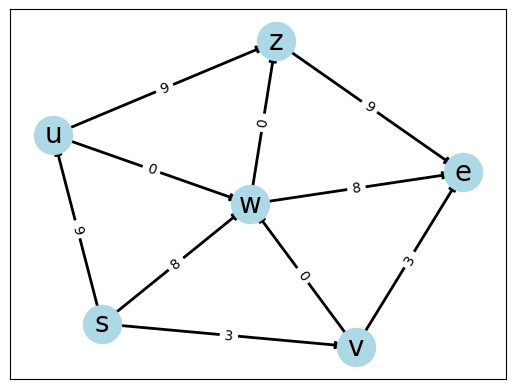

-------------------------------------------------------------------------------
Maximum Flow through our Algorithm
20
-------------------------------------------------------------------------------
Maximum Flow through Edmonds Karp Algortihm
20


In [62]:
G = nx.DiGraph()   #unlike in Project 1, the edges in the network are directed.
G.add_edges_from([('s', 'v', {'flow': 0}), ('s', 'v',{'capacity': 10}),
 ('s', 'w',{'flow': 0}), ('s', 'w',{'capacity': 8}),
  ('s','u',{'flow': 0}), ('s','u',{'capacity': 11}),
   ('v','w', {'flow': 0}), ('v','w',{'capacity': 9}),
    ('v','e', {'flow': 0}), ('v','e',{'capacity': 3}),              # modified from last version: edge (1,4) replaced by edge (1,5)
     ('u','w', {'flow': 0}), ('u','w',{'capacity': 8}),
      ('u','z', {'flow': 0}), ('u','z',{'capacity': 12}),
       ('w','e', {'flow': 0}), ('w','e',{'capacity': 8}),
        ('w','z',{'flow': 0}), ('w','z',{'capacity': 9}),
         ('z','e', {'flow': 0}), ('z','e',{'capacity': 9})])



simulated_annealing(G, 's', 'e', 100, 0.01)

In [ ]:
import numpy as np

def bk_simulated_annealing(graph, source, sink, initialTemp, coolingSchedule):
  all_paths = getAllPaths(graph, sink, source)
  initializeFlow1 = [0] * len(all_paths)
  initializeFlow2 = [0] * len(all_paths)


  T = initialTemp
  alpha = coolingSchedule
  current = None
  currentIndex = -1
  loop = 0

  while round(float(T), 2) != 0.00:
    successor = None


    successorIndex = np.random.randint(0, len(all_paths))
    successor = all_paths[successorIndex]

    while successorIndex == currentIndex:
      successorIndex = np.random.randint(0, len(all_paths))
      successor = all_paths[successorIndex]


    print(successor)

    print('Check1: '+str(initializeFlow2))
    flowValue, changeInFlow, initializeFlow1 = change_in_flow(graph, source, sink, successor, all_paths, initializeFlow1)
    print('Check2: '+str(initializeFlow2))
    print(flowValue)
    initializeFlow1, initializeFlow2, current = verifySuccessor(current, successor, flowValue, changeInFlow, T, initializeFlow1, initializeFlow2)

    print('lastFlow:' + str(initializeFlow1))
    graph = adjustGraph(graph, all_paths, initializeFlow1)

    print(current)

    print('--------------------------------------------------------------')
    print('----------------------------------------------------------------')

    T = T * (1 - alpha)

  links = [(u, v) for (u, v, d) in graph.edges(data=True)]
  pos = nx.nx_pydot.graphviz_layout(graph)
  nx.draw_networkx_nodes(graph, pos, node_size=800, node_color='lightblue', linewidths=0.05)
  nx.draw_networkx_edges(graph, pos, edgelist=links, width=2)

  nx.draw_networkx_labels(graph, pos, font_size=20, font_family="sans-serif")

  edge_labels = nx.get_edge_attributes(graph, 'capacity')
  ##print(edge_labels)

  nx.draw_networkx_edge_labels(graph, pos, edge_labels)

  plt.show()

  links = [(u, v) for (u, v, d) in graph.edges(data=True)]
  pos = nx.nx_pydot.graphviz_layout(graph)
  nx.draw_networkx_nodes(graph, pos, node_size=800, node_color='lightblue', linewidths=0.05)
  nx.draw_networkx_edges(graph, pos, edgelist=links, width=2)

  nx.draw_networkx_labels(graph, pos, font_size=20, font_family="sans-serif")

  edge_labels = nx.get_edge_attributes(graph, 'flow')
  ##print(edge_labels)

  nx.draw_networkx_edge_labels(graph, pos, edge_labels)

  plt.show()


